In [7]:
%%capture
## [TEMPLATE BEGIN]
## おまじない：実行中のノートブック名からOUTPUT_DIRを決めるコード
from pathlib import Path
from IPython import get_ipython; ip = get_ipython()
if '__vsc_ipynb_file__' in ip.user_ns:
    ## VS Codeで実行されている場合
    THIS_NOTEBOOK_PATH = Path(ip.user_ns['__vsc_ipynb_file__'])
else:
    !pip install ipynbname
    import ipynbname; THIS_NOTEBOOK_PATH = Path(ipynbname.path())
    if "%2F" in THIS_NOTEBOOK_PATH.stem:
        ## Google Colabで実行されている場合
        colab_ip = %system hostname -I   # uses colab magic to get list from bash
        colab_ip = colab_ip[0].strip()   # returns "172.28.0.12"
        colab_port = 9000                # could use 6000, 8080, or 9000
        import requests
        filename = requests.get(f"http://{colab_ip}:{colab_port}/api/sessions").json()[0]["name"]
        THIS_NOTEBOOK_PATH = Path(filename)
    else:
        ## それ以外の場合
        THIS_NOTEBOOK_PATH = THIS_NOTEBOOK_PATH

OUTPUT_DIR = Path("figures") / THIS_NOTEBOOK_PATH.stem
## [TEMPLATE END]

In [8]:
print("File output directory:", OUTPUT_DIR)
# Create the output directory if it does not exist
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

File output directory: figures/_softmax_with_temperature


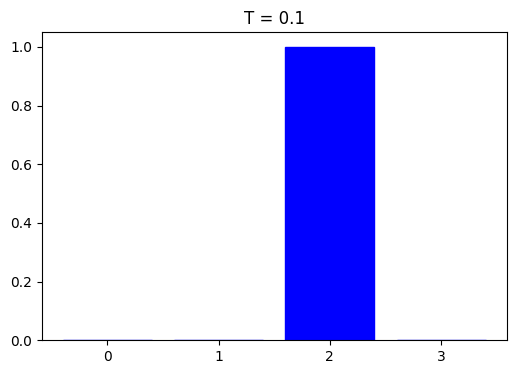

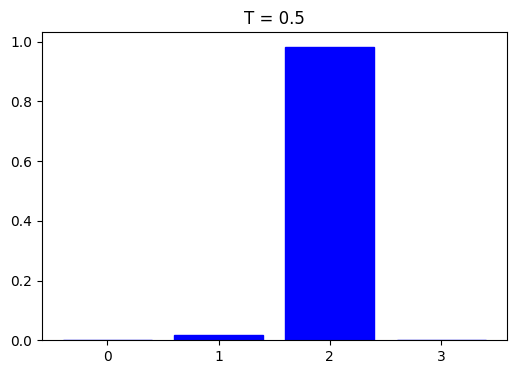

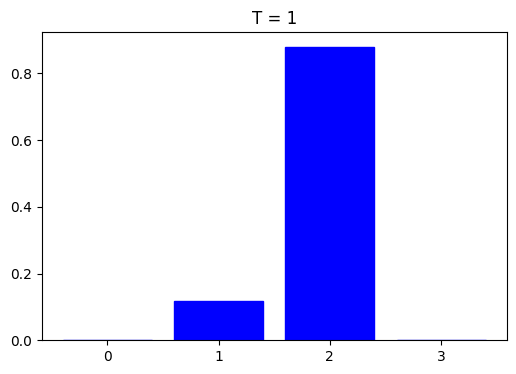

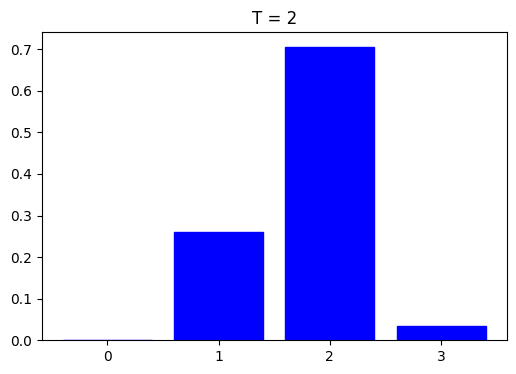

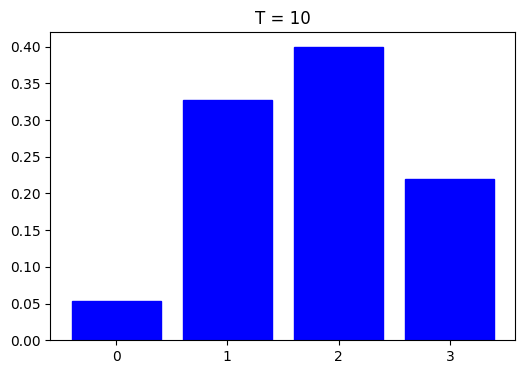

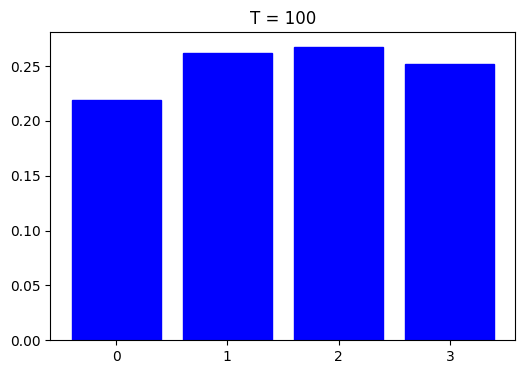

全ての画像が保存されました。


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# 色の設定
colors = {
    "white": "#FFFFFF",
    "light_gray": "#D3D3D3",
    "gray": "#808080",
    "black": "#000000",
    "green": "#008000",
    "blue": "#0000FF",
    "light_blue": "#ADD8E6",
    "light_light_blue": "#E0FFFF",
    "yellow": "#FFFF00",
    "orange": "#FFA500",
    "dark_orange": "#FF8C00",
    "purple": "#800080"
}

# 固定値のベクトルの定義
vector = np.array([-10, 8, 10, 4])

# 温度パラメーターの定義
temperatures = [0.1, 0.5, 1, 2, 10, 100]

# Softmax関数の定義
def softmax(x, T):
    e_x = np.exp(x / T)
    return e_x / e_x.sum()

# プロットの設定
plt.rcParams.update({'axes.facecolor': colors["white"], 'figure.facecolor': colors["white"]})

# 各温度パラメーターに対してSoftmaxを計算し、プロットを作成
output_paths = []
for T in temperatures:
    softmax_output = softmax(vector, T)
    plt.figure(figsize=(6, 4))
    bars = plt.bar(range(len(vector)), softmax_output, color=colors["blue"])
    plt.title(f'T = {T}', color=colors["black"])
    plt.xticks(range(len(vector)), color=colors["black"])
    plt.yticks(color=colors["black"])

    # 棒グラフの色を設定
    for bar in bars:
        bar.set_color(colors["blue"])

    # グラフを保存
    output_path = OUTPUT_DIR / f"softmax_output_fixed_vector_T{T}.png"
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close()
    output_paths.append(output_path)